In [124]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [125]:
df = pd.read_csv('dataset_mood_smartphone.csv')


In [126]:
df.head()

,Unnamed: 0,id,time,variable,value
0,1,AS14.01,2014-02-26 13:00:00.000,mood,6.0
1,2,AS14.01,2014-02-26 15:00:00.000,mood,6.0
2,3,AS14.01,2014-02-26 18:00:00.000,mood,6.0
3,4,AS14.01,2014-02-26 21:00:00.000,mood,7.0
4,5,AS14.01,2014-02-27 09:00:00.000,mood,6.0


In [127]:
df.dtypes

Unnamed: 0      int64
id             object
time           object
variable       object
value         float64
dtype: object

The datatypes

In [128]:
df.isna().sum()

Unnamed: 0      0
id              0
time            0
variable        0
value         202
dtype: int64

- 202 missing values in the column "values"

In [129]:
# transorming the dtype of "time"
df=df.dropna()
df["time"] = pd.to_datetime(df["time"])
df = df.drop('Unnamed: 0', axis=1)

In [130]:
# transformatiing the variable name

# removed appcat string from variable name
# AS14.01 -> 01
df.loc[df['variable'].str.startswith('appCat.'), 'variable'] = df.loc[df['variable'].str.startswith('appCat.'), 'variable'].str.replace('appCat.', '')
df.loc[df['variable'].str.startswith('circumplex.'), 'variable'] = df.loc[df['variable'].str.startswith('circumplex.'), 'variable'].str.replace('circumplex.', '')
df.loc[df['id'].str.startswith('AS14.'), 'id'] = df.loc[df['id'].str.startswith('AS14.'), 'id'].str.replace('AS14.', '')

/var/folders/g0/vt46_r791hs_69nxfq419_ch0000gn/T/ipykernel_30705/2364289440.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df.loc[df['variable'].str.startswith('appCat.'), 'variable'] = df.loc[df['variable'].str.startswith('appCat.'), 'variable'].str.replace('appCat.', '')
/var/folders/g0/vt46_r791hs_69nxfq419_ch0000gn/T/ipykernel_30705/2364289440.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df.loc[df['variable'].str.startswith('circumplex.'), 'variable'] = df.loc[df['variable'].str.startswith('circumplex.'), 'variable'].str.replace('circumplex.', '')
/var/folders/g0/vt46_r791hs_69nxfq419_ch0000gn/T/ipykernel_30705/2364289440.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df.loc[df['id'].str.startswith('AS14.'), 'id'] = df.loc[df['id'].str.startswith('AS14.'), 'id'].str.replace('AS14.', '')


In [131]:
df.describe(include="all")


/var/folders/g0/vt46_r791hs_69nxfq419_ch0000gn/T/ipykernel_30705/1519091745.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include="all")


,id,time,variable,value
count,376710,376710,376710,376710.000000
unique,27,336907,19,NaN
top,01,2014-04-17 18:00:00,screen,NaN
freq,21982,90,96578,NaN
first,NaN,2014-02-17 07:00:52.197000,NaN,NaN
last,NaN,2014-06-09 00:00:00,NaN,NaN
mean,NaN,NaN,NaN,40.665313
std,NaN,NaN,NaN,273.726007
min,NaN,NaN,NaN,-82798.871000
25%,NaN,NaN,NaN,2.025000


/var/folders/g0/vt46_r791hs_69nxfq419_ch0000gn/T/ipykernel_30705/16994401.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,1)
/var/folders/g0/vt46_r791hs_69nxfq419_ch0000gn/T/ipykernel_30705/16994401.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,2)


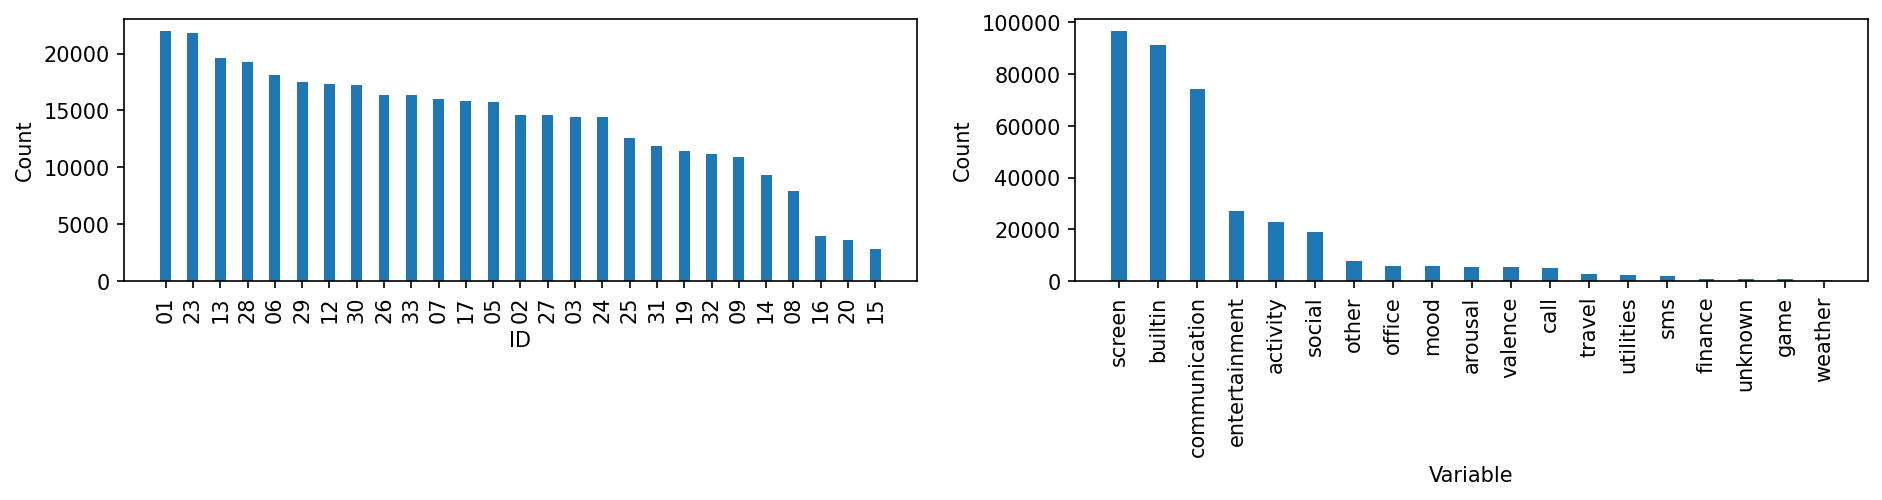

In [132]:
fig,ax = plt.subplots(1,2,figsize=[15,5])


x = df['id'].value_counts()
cols = [i for i in x.axes[0]]
vals = [i for i in x]
plt.subplot(2,2,1)
plt.bar(cols, vals, width = 0.4) 
plt.xlabel("ID")
plt.ylabel("Count")
plt.xticks(rotation=90)

x = df['variable'].value_counts()
cols = [i for i in x.axes[0]]
vals = [i for i in x]
plt.subplot(2,2,2)
plt.bar(cols, vals, width = 0.4)
plt.xlabel("Variable")
plt.ylabel("Count")
plt.xticks(rotation=90)

plt.show()


- It can be seen that the amount of data collected for various id's is different.
- Similarly, the observed data per variable is non homgenously distributed

# Plotting Graphs

In [133]:
# import warnings
# warnings.filterwarnings('ignore')

# x = df['id'].value_counts()
# cols = [i for i in x.axes[0]]
# count = 1
# for i in cols:
#     # plt.subplot(14,2,count)
#     # count += 1

#     grouped = df.groupby('id')
#     col = grouped.get_group(i)

#     x = col['variable'].value_counts()
#     x = [i for i in x.axes[0]]
#     y = list(col['variable'].value_counts())
#     z=x
#     data_list = pd.DataFrame(
#         {'x_axis': x,
#         'y_axis': y,
#         'category': z
#         })

#     minsize = min(data_list['y_axis'])
#     maxsize = max(data_list['y_axis'])

#     sns.catplot(x="x_axis", y="y_axis", kind="swarm", hue="category",sizes=(100,100), data=data_list)
#     sns.set_style('darkgrid')
#     plt.xticks(rotation=90)
#     plt.xlabel('Variables')
#     plt.ylabel('Count')
#     plt.title(f'Count of variables per id for participant {i}')
# # plt.show()

In [134]:
# for variable in df['variable'].unique():
#     temp_df = df[df['variable'] == variable]
#     group = temp_df.groupby('id')['value'].mean().reset_index()
#     # plot the grouped data
#     sns.set(rc={'figure.figsize':(10,5)})
#     sns.scatterplot(x=group['id'], y = group['value'])
#     plt.xlabel('id')
#     plt.ylabel('mean value')
#     plt.title(f'Mean value of {variable} column for each id')
#     plt.figure(figsize=(200, 5))
#     plt.show()

# Transforming the data

In [135]:
df['time'][:10]

/var/folders/g0/vt46_r791hs_69nxfq419_ch0000gn/T/ipykernel_30705/3470066433.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  df['time'][:10]


0   2014-02-26 13:00:00
1   2014-02-26 15:00:00
2   2014-02-26 18:00:00
3   2014-02-26 21:00:00
4   2014-02-27 09:00:00
5   2014-02-27 12:00:00
6   2014-02-27 15:00:00
7   2014-03-21 09:00:00
8   2014-03-21 11:00:00
9   2014-03-21 15:00:00
Name: time, dtype: datetime64[ns]

In [136]:
df['date'] = df['time'].dt.date



In [137]:
df['date'][:5]

/var/folders/g0/vt46_r791hs_69nxfq419_ch0000gn/T/ipykernel_30705/1752055502.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  df['date'][:5]


0    2014-02-26
1    2014-02-26
2    2014-02-26
3    2014-02-26
4    2014-02-27
Name: date, dtype: object

In [138]:
import numpy as np
new_df_mean = pd.pivot_table(df, values='value', index=['id', 'date'], columns=['variable'], 
                        aggfunc='mean').reset_index()
new_df_sum = pd.pivot_table(df, values='value', index=['id', 'date'], columns=['variable'], 
                        aggfunc='sum').reset_index()

print(new_df_mean.head(5))
print(new_df_sum.head(5))

variable  id        date  activity  arousal  builtin  call  communication  \
0         01  2014-02-17       NaN      NaN      NaN   1.0            NaN   
1         01  2014-02-18       NaN      NaN      NaN   1.0            NaN   
2         01  2014-02-19       NaN      NaN      NaN   1.0            NaN   
3         01  2014-02-20       NaN      NaN      NaN   1.0            NaN   
4         01  2014-02-21       NaN      NaN      NaN   NaN            NaN   

variable  entertainment  finance  game  ...  office  other  screen  sms  \
0                   NaN      NaN   NaN  ...     NaN    NaN     NaN  NaN   
1                   NaN      NaN   NaN  ...     NaN    NaN     NaN  NaN   
2                   NaN      NaN   NaN  ...     NaN    NaN     NaN  1.0   
3                   NaN      NaN   NaN  ...     NaN    NaN     NaN  1.0   
4                   NaN      NaN   NaN  ...     NaN    NaN     NaN  1.0   

variable  social  travel  unknown  utilities  valence  weather  
0            NaN     

In [139]:
df['variable'].unique()

array(['mood', 'arousal', 'valence', 'activity', 'screen', 'call', 'sms',
       'builtin', 'communication', 'entertainment', 'finance', 'game',
       'office', 'other', 'social', 'travel', 'unknown', 'utilities',
       'weather'], dtype=object)

In [140]:
# Picking mood, valence, arousal and activity from new_df_mean while other from new_df_sum
transformed_df = pd.concat([new_df_mean[['id', 'date','mood', 'arousal', 'valence', 'activity']], new_df_sum[['screen', 'call', 'sms',
       'builtin', 'communication', 'entertainment', 'finance', 'game',
       'office', 'other', 'social', 'travel', 'unknown', 'utilities',
       'weather']]], axis=1).reset_index(drop=True)

transformed_df.head(5)

variable,id,date,mood,arousal,valence,activity,screen,call,sms,builtin,...,entertainment,finance,game,office,other,social,travel,unknown,utilities,weather
0,01,2014-02-17,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01,2014-02-18,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01,2014-02-19,NaN,NaN,NaN,NaN,NaN,7.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01,2014-02-20,NaN,NaN,NaN,NaN,NaN,2.0,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01,2014-02-21,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [141]:
transformed_df['date'] = pd.to_datetime(transformed_df['date'])
print(transformed_df.dtypes)
transformed_df['date'][:10]

variable
id                       object
date             datetime64[ns]
mood                    float64
arousal                 float64
valence                 float64
activity                float64
screen                  float64
call                    float64
sms                     float64
builtin                 float64
communication           float64
entertainment           float64
finance                 float64
game                    float64
office                  float64
other                   float64
social                  float64
travel                  float64
unknown                 float64
utilities               float64
weather                 float64
dtype: object


0   2014-02-17
1   2014-02-18
2   2014-02-19
3   2014-02-20
4   2014-02-21
5   2014-02-22
6   2014-02-25
7   2014-02-26
8   2014-02-27
9   2014-02-28
Name: date, dtype: datetime64[ns]

In [142]:
transformed_df.describe().T

,count,mean,std,min,25%,50%,75%,max
variable,,,,,,,,
mood,1268.0,6.990063,0.736465,3.000,6.600000,7.000000,7.500000,9.333333
arousal,1268.0,-0.103851,0.662715,-2.000,-0.600000,0.000000,0.400000,2.000000
valence,1266.0,0.687112,0.434602,-1.250,0.400000,0.800000,1.000000,2.000000
activity,1188.0,0.120003,0.098301,0.000,0.054872,0.095634,0.149358,0.566171
screen,1207.0,6027.939920,4696.746814,0.462,2423.275500,5026.947999,8558.515500,36204.105001
call,1338.0,3.915546,3.555254,1.000,1.000000,3.000000,5.000000,31.000000
sms,734.0,2.449591,2.327730,1.000,1.000000,1.000000,3.000000,17.000000
builtin,1195.0,1416.168076,3841.698865,-80367.930,262.656000,764.085000,1558.217000,40323.877000
communication,1183.0,2721.389269,2466.290266,1.095,867.679500,2078.403000,3789.369000,20718.749000


In [143]:
# df_grouped = df.groupby([df['id'], df['variable'], df['time'].dt.date])


# # Apply mean aggregation to "value" column for each group
# df_mean = df_grouped.agg({'value': 'mean'})

# # Reset index to make the groupby columns as regular columns
# df_mean = df_mean.reset_index()

# # Pivot the data
# df_mean['time'] = pd.to_datetime(df_mean['time'])
# new_df = df_mean.pivot(index=['id', 'time'], columns='variable', values='value')
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

# # Display the entire dataframe
# #new_df.to_excel('output_file.xlsx', index=True)
# new_df
# #new_df.isnull().sum()


## level 0 visualization

In [144]:
import missingno as msno

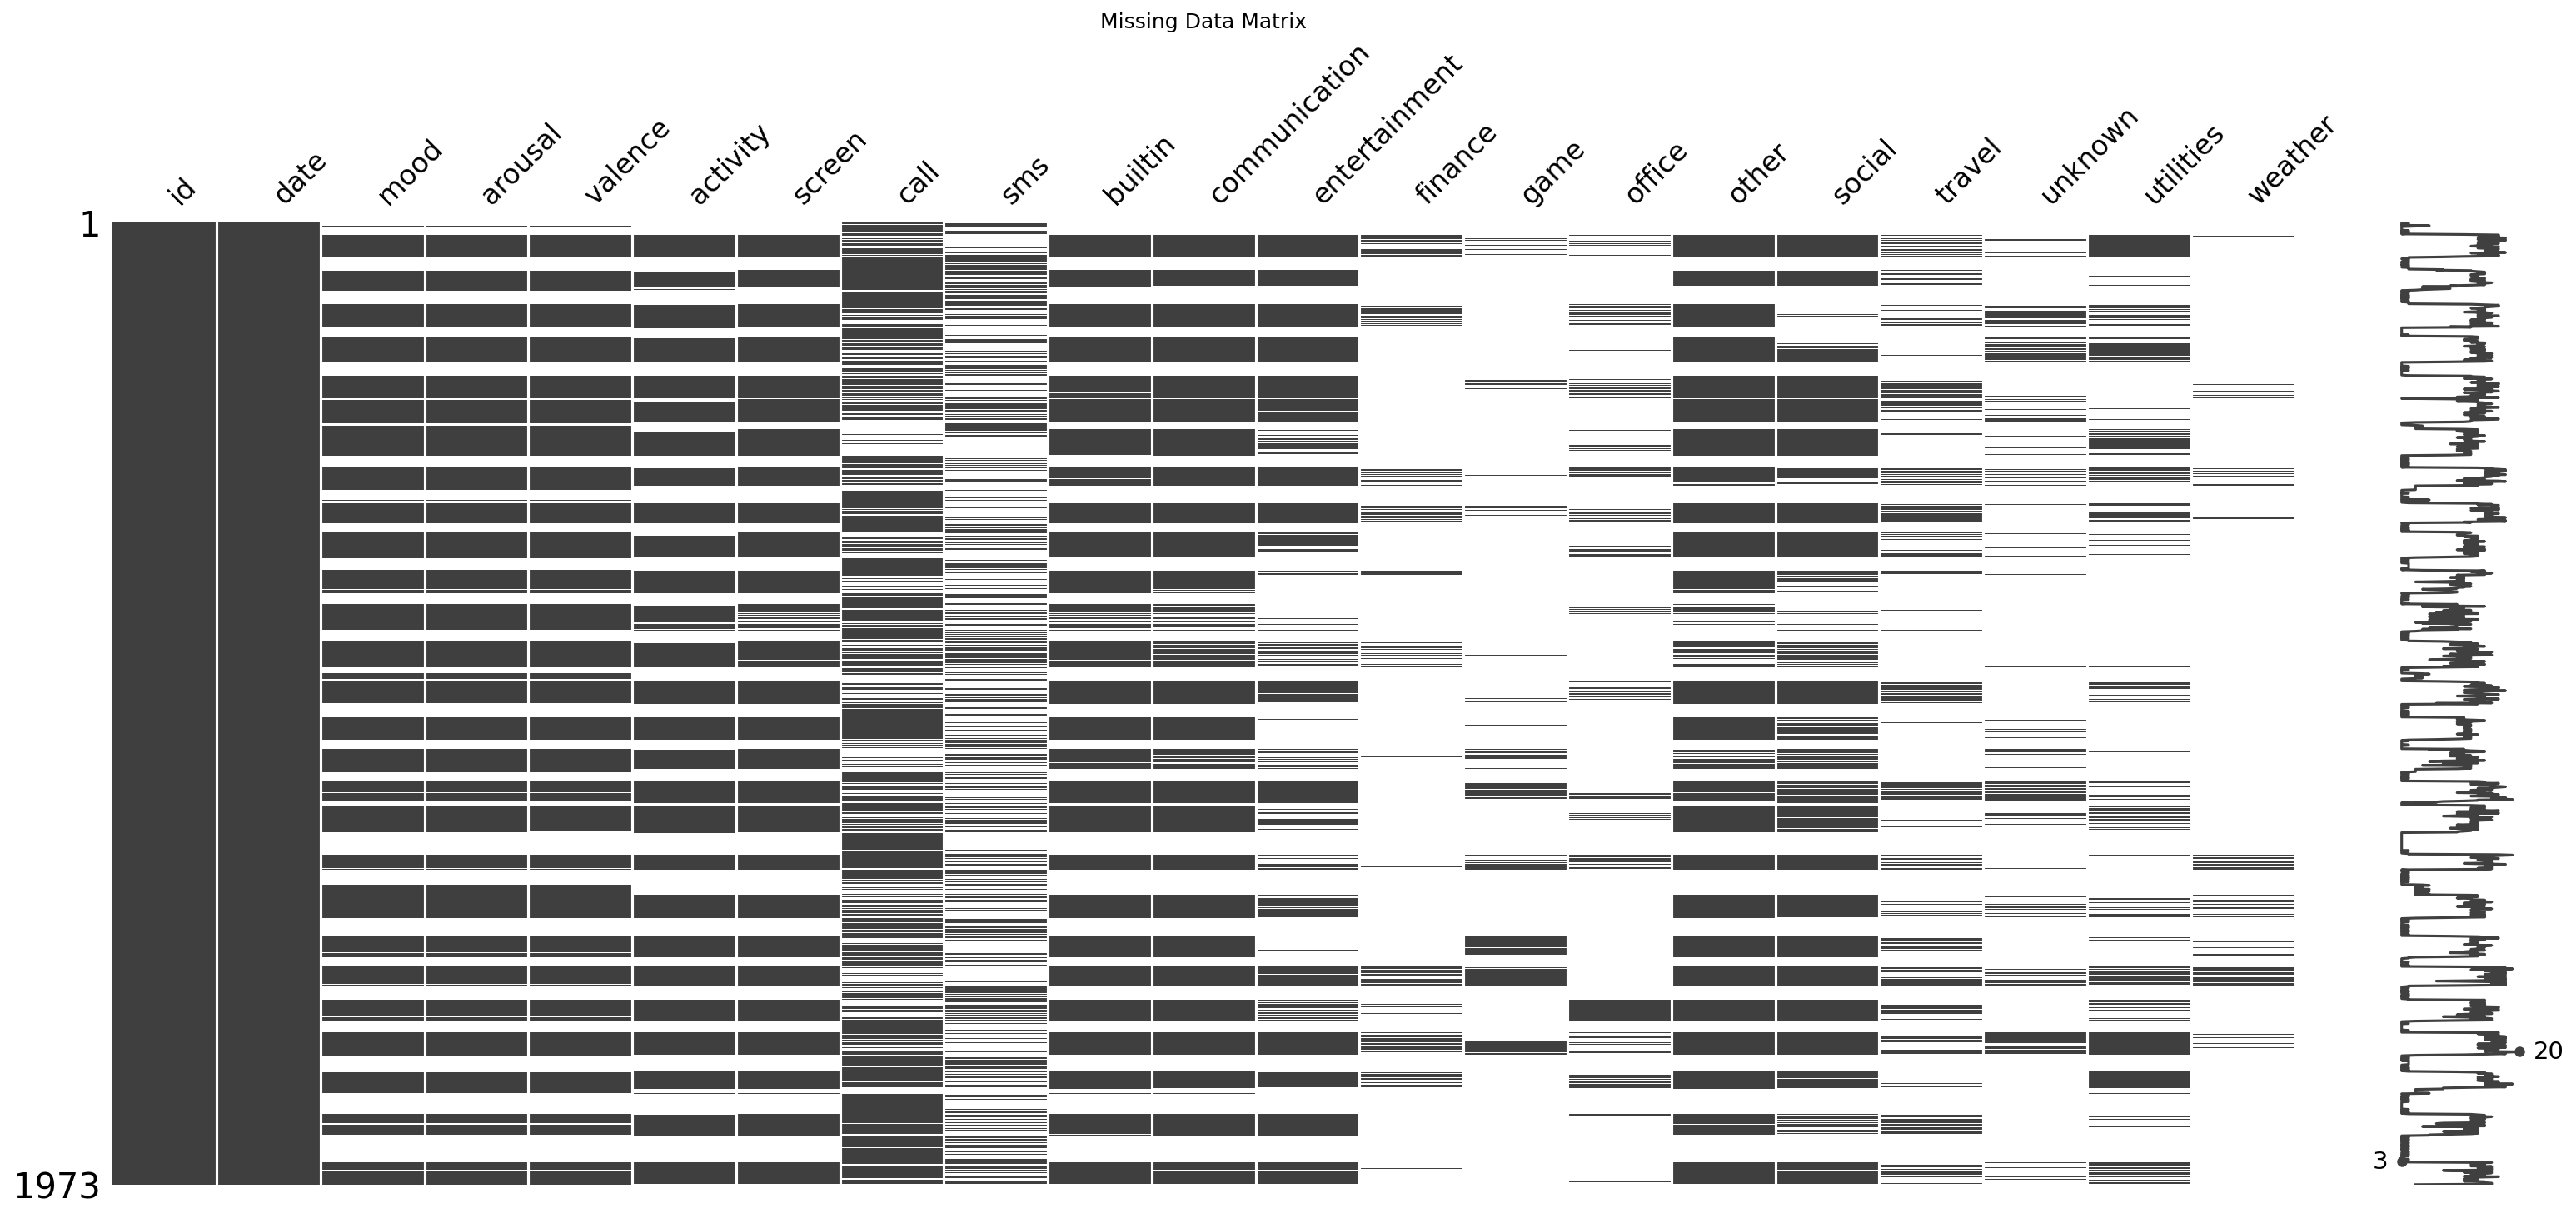

In [145]:
msno.matrix(transformed_df)

# add labels and display the plot
plt.title('Missing Data Matrix')
plt.show()


- Lot of missing values in Unknown, finance, game, weather.

/var/folders/g0/vt46_r791hs_69nxfq419_ch0000gn/T/ipykernel_30705/273651269.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = transformed_df.groupby('id').mean()


Text(0, 0.5, 'Means of Variables')

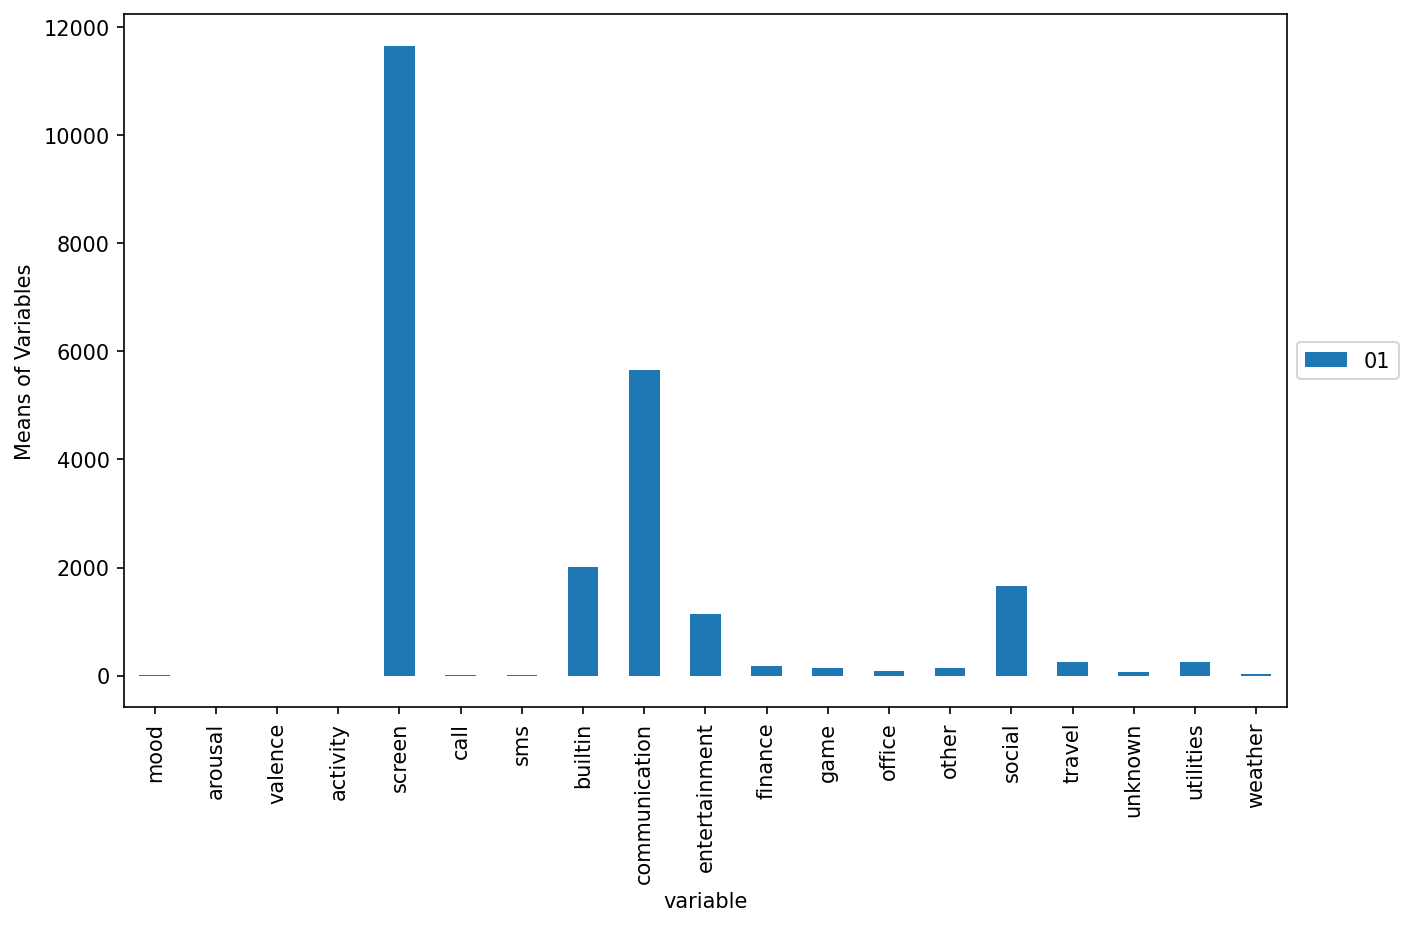

In [146]:
transformed_df['id'] = transformed_df['id'].astype(str)
grouped = transformed_df.groupby('id').mean()

# plot a bar chart of the mean 'value' for each category using matplotlib

plt.rcParams['figure.dpi'] = 150
grouped.loc['01'].plot(kind='bar',figsize=(10, 6))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('Means of Variables')


## Imputing the NaN's

Planned methodologies:
1. KNN
2. ARIMA
3. KNN+ARIMA

In [147]:
transformed_df.columns

Index(['id', 'date', 'mood', 'arousal', 'valence', 'activity', 'screen',
       'call', 'sms', 'builtin', 'communication', 'entertainment', 'finance',
       'game', 'office', 'other', 'social', 'travel', 'unknown', 'utilities',
       'weather'],
      dtype='object', name='variable')

In [148]:
transformed_df.set_index('date',inplace=True)

print(transformed_df.index)
transformed_df.dtypes


DatetimeIndex(['2014-02-17', '2014-02-18', '2014-02-19', '2014-02-20',
               '2014-02-21', '2014-02-22', '2014-02-25', '2014-02-26',
               '2014-02-27', '2014-02-28',
               ...
               '2014-05-22', '2014-05-23', '2014-05-24', '2014-05-25',
               '2014-05-26', '2014-05-27', '2014-05-28', '2014-05-29',
               '2014-05-30', '2014-05-31'],
              dtype='datetime64[ns]', name='date', length=1973, freq=None)


variable
id                object
mood             float64
arousal          float64
valence          float64
activity         float64
screen           float64
call             float64
sms              float64
builtin          float64
communication    float64
entertainment    float64
finance          float64
game             float64
office           float64
other            float64
social           float64
travel           float64
unknown          float64
utilities        float64
weather          float64
dtype: object

In [149]:
grouped = transformed_df.groupby('id')

# loop through each group and impute missing values
for name, group in grouped:
    # sort the group by the time series column
    #group['date'] = pd.to_datetime(group['date'],errors='coerce')
    print(group)
    break

variable    id  mood  arousal  valence  activity        screen  call  sms  \
date                                                                        
2014-02-17  01   NaN      NaN      NaN       NaN           NaN   2.0  NaN   
2014-02-18  01   NaN      NaN      NaN       NaN           NaN   1.0  NaN   
2014-02-19  01   NaN      NaN      NaN       NaN           NaN   7.0  2.0   
2014-02-20  01   NaN      NaN      NaN       NaN           NaN   2.0  3.0   
2014-02-21  01   NaN      NaN      NaN       NaN           NaN   NaN  1.0   
...         ..   ...      ...      ...       ...           ...   ...  ...   
2014-05-01  01   8.0     -0.4      1.0  0.037065  15516.951998   7.0  4.0   
2014-05-02  01   7.6     -0.2      1.0  0.077341  15088.519001   NaN  NaN   
2014-05-03  01   8.0     -0.2      1.0  0.071741   8186.036001   NaN  1.0   
2014-05-04  01   8.0     -0.5      1.0  0.136192   5889.194999   NaN  NaN   
2014-05-05  01   NaN      NaN      NaN  0.007843   1788.734000   NaN  NaN   

In [150]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.impute import KNNImputer


# group the data by the categorical column
grouped = transformed_df.groupby('id')

# loop through each group and impute missing values
for name, group in grouped:
    # sort the group by the time series column
    #group['date'] = pd.to_datetime(group['date'],errors='coerce')
    group = group.sort_values('date')
    
    # use ARIMA to impute missing values
    arima_model = ARIMA(group['date'], order=(1, 1, 1))
    arima_fit = arima_model.fit()
    group['date'] = arima_fit.predict(start=0, end=len(group)-1)
    
    # use KNN imputation to impute remaining missing values
    imputer = KNNImputer(n_neighbors=5)
    group = pd.DataFrame(imputer.fit_transform(group), columns=group.columns)
    
    # update the imputed group in the original dataframe
    transformed_df.loc[df['id'] == name] = group

# # save the imputed dataframe
# df.to_csv('imputed_dataset.csv', index=False)
transformed_df.head(10)

KeyError: 'date'